In [1]:
import variational_bayes as vb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean = np.asarray((5, -2))
precision = np.asarray([[4, -1], [-1, 2]])
n = 100

x = np.random.multivariate_normal(mean, np.linalg.inv(precision), n)

In [3]:
q_mean = vb.MultiNormalDistribution(np.zeros(2), 1e-3 * np.eye(2))
q_precision = vb.WishartDistribution(np.asarray(3), np.eye(2))
likelihood = vb.MultiNormalLikelihood(x, q_mean, q_precision)

model = vb.Model({'mean': q_mean, 'precision': q_precision}, [likelihood])
elbo = model.update(100)

Mean     : [ 4.92822687 -2.02106305] +- [ 0.04865032  0.07641732]
Precision: [[ 4.86898741 -1.12731572]
 [-1.12731572  1.97345146]] +- [[ 0.66880686  0.32037053]
 [ 0.32037053  0.27107441]]


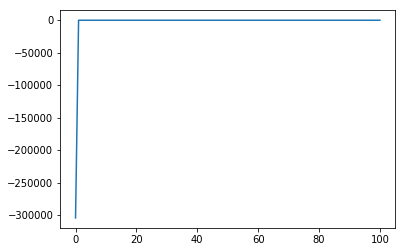

In [4]:
plt.plot(elbo)
print("Mean     : %s +- %s" % (model['mean'].mean, model['mean'].std))
print("Precision: %s +- %s" % (model['precision'].mean, model['precision'].std))

<Container object of 3 artists>

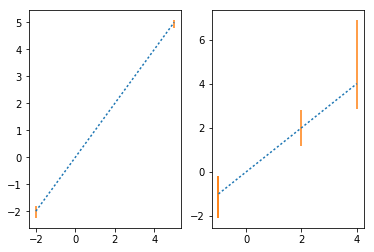

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
vb.plot_comparison(q_mean, mean, ax=ax1)
vb.plot_comparison(q_precision, precision, ax=ax2)